In [1]:
%%capture
%run table.ipynb

In [2]:
%matplotlib inline
df = df_w[df_w["$n$"] == 1920]
df

,$n$,$c$,$\nu_8$,$f$,$\epsilon$,$\frac{k_{diss}}{k_f}$,$F_f$,$Ro_f$,$Bu$,$\frac{<\bf \Omega_0 >}{{(P k_f^2)}^{2/3}}$,$E$,$t_{stat}$,$t_{\max}$,short name
W2,1920,10,9.68e-13,0,1.06,57.7,0.112,inf,inf,1,3.01,4.66,49.8,noise_c10nh1920Buinf
W6,1920,20,9.69e-13,0,1.02,57.7,0.0553,inf,inf,1,3.64,5.61,120,noise_c20nh1920Buinf
W10,1920,40,9.68e-13,0,0.998,57.7,0.0274,inf,inf,1,4.78,7.12,49.8,noise_c40nh1920Buinf
W13,1920,100,9.69e-13,0,1.01,57.7,0.011,inf,inf,1,7.38,10.2,120,noise_c100nh1920Buinf
W17,1920,400,9.69e-13,0,1.15,57.7,0.00288,inf,inf,1,15.5,21.3,120,noise_c400nh1920Buinf
W20,1920,700,9.68e-13,0,1.05,57.7,0.0016,inf,inf,1,19.5,22.2,49.8,noise_c700nh1920Buinf


In [3]:
import fluidsim as fls
import numpy as np
from base import _k_f, set_figsize, _rxs_str_func, matplotlib_rc, _eps, _k_f
from paths import paths_sim, exit_if_figure_exists


def froude(sim, t_start):
    eps = _eps(sim, t_start)
    c = sim.params.c2 ** 0.5
    L_f = np.pi / _k_f(sim.params)
    F_f = (eps * L_f) ** (1. / 3) / c
    return F_f

def fig_flatness(path, fig, axes, tmin=0, tmax=1000, delta_t=0.5, label='', run_nb=0):
    sim = fls.load_sim_for_plot(path, merge_missing_params=True)
    order = [2, 4]
    key_var = ['uy', 'ux']
    rxs, So_var_dict, deltax = _rxs_str_func(
        sim, order, tmin, tmax, delta_t, key_var)

    _label = {'ux': '$F_L$', 'uy': '$F_T$'}
    L_f = np.pi / _k_f(sim.params)
    color_list = ['r', 'b', 'g', 'c', 'm', 'k']
    cond = np.logical_and(rxs > 0.012 * L_f, rxs < 0.06 * L_f)

    F = {}
    F_f = froude(sim, tmin)
    for i, (key, ax) in enumerate(zip(key_var, axes[:2].ravel())):
        ax.set_xlabel('$r_x/F_f$')
        ax.set_ylabel(f'{_label[key]}')

        # ax.set_title('Flatness of longitundinal and transverse increments')
        # ax.hold(True)
        ax.set_xscale('log')
        ax.set_yscale('log')
        color1 = color_list[run_nb]
        So_4 = So_var_dict['{0}_{1:.0f}'.format(key, 4)]
        So_2 = So_var_dict['{0}_{1:.0f}'.format(key, 2)]
        F[key] = So_4 / So_2 ** 2
        ax.plot(rxs / F_f, F[key], color1,
                linewidth=1, label=label)

    # axes[2].plot(rxs / F_f, F['uy'] / F['ux'], 'k')
#         ax.plot(rxs[cond] / F_f, F_f / rxs[cond], 'k', linewidth=0.5)
#         x_text = rxs[cond].mean() / F_f
#         y_text = F_f / rxs[cond].mean() * 1.05
#         ax.text(x_text, y_text, '$r^{-1}$')
#         ax.legend(fontsize=7, loc='lower left')


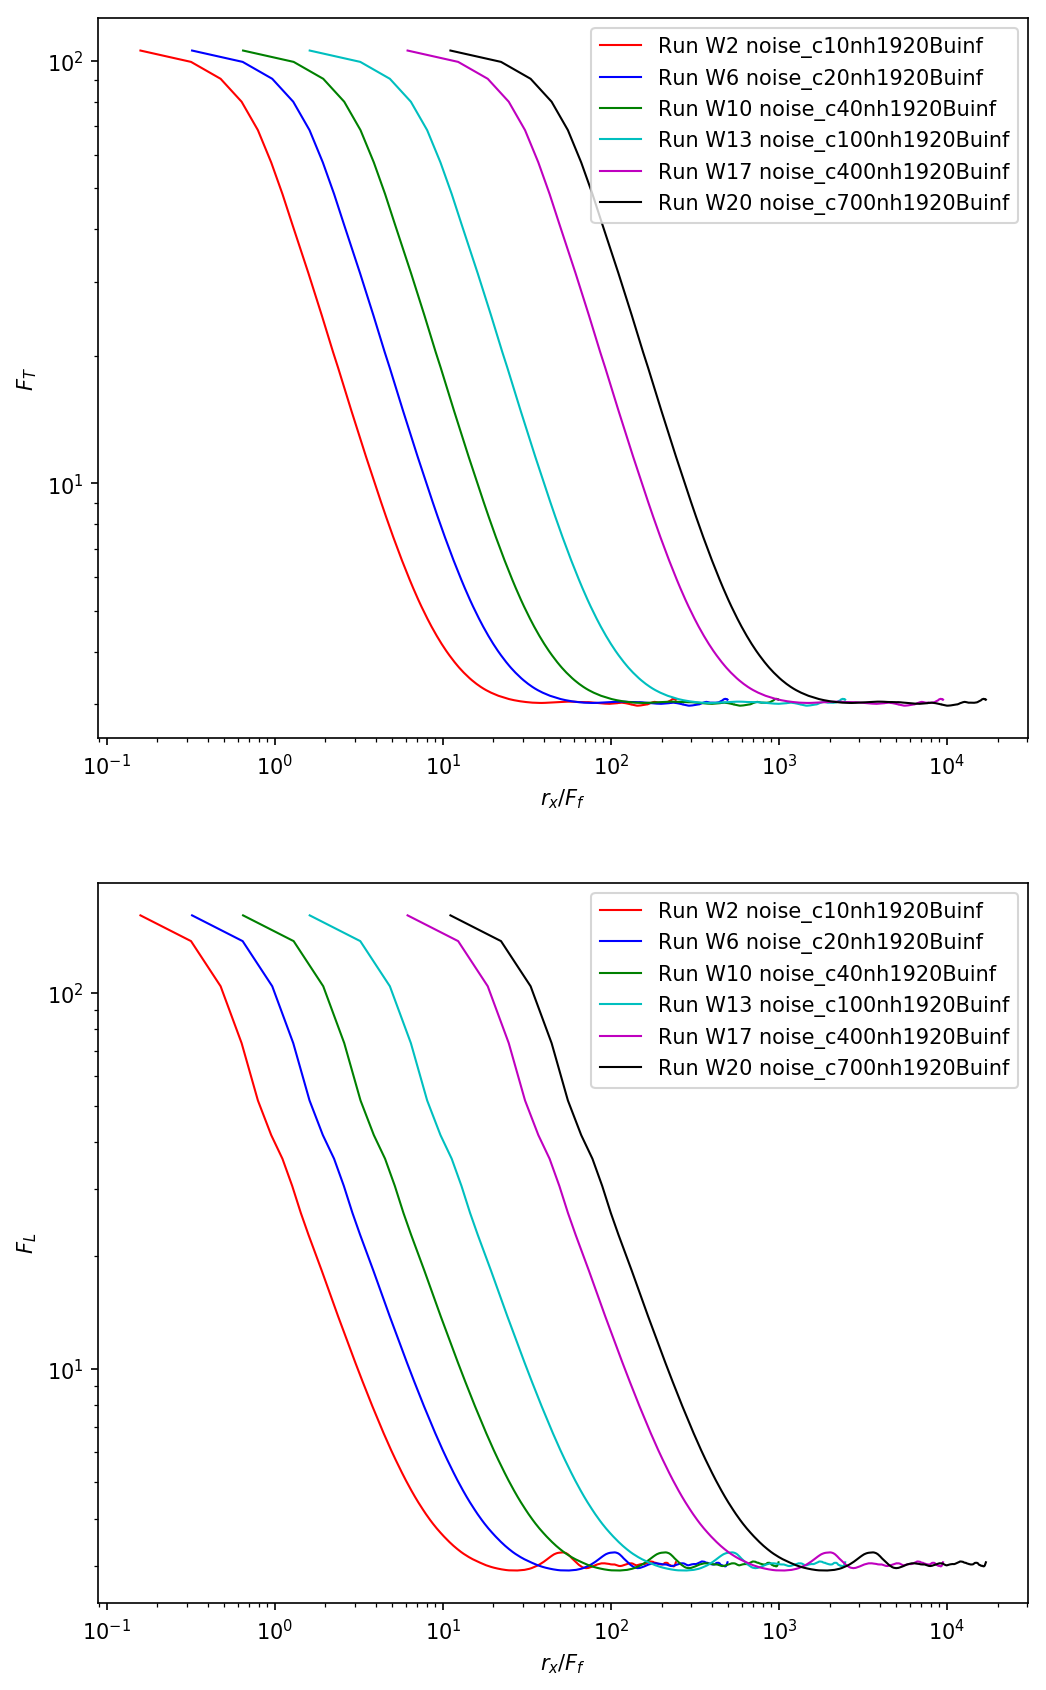

In [4]:
%%capture --no-display
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, dpi=150, figsize=(8,14))
for i in range(len(df)):
    row = df.iloc[i]
    short_name = row["short name"]
    path = paths_sim[short_name]
    tmin = row[r"$t_{stat}$"]
    fig_flatness(path, fig, axes, tmin, label=f"Run {row.name} {short_name}", run_nb=i)

for ax in axes:
    ax.legend()

In [6]:
sim = fls.load_sim_for_plot(path, merge_missing_params=True)

Add parameter attributes:  {'beta'}
Add parameter attributes:  {'NO_SHEAR_MODES'}
Add parameter attributes:  {'deltat_max', 'cfl_coef'}
Add parameter attributes:  {'modif_after_init'}
Add parameter attributes:  {'enable'}
Add parameter children:  {'tcrandom', 'normalized'}
Add parameter attributes:  {'type', 'which_root'}
Add parameter attributes:  {'only_positive'}
Add parameter attributes:  {'time_correlation'}
ImportError: fluidfft.fft2d.with_cufft
params.oper.type_fft FFTWCCY -> fft2d.with_fftw1d
*************************************
Program fluidsim
To plot the forcing modes, you can use:
sim.forcing.forcing_maker.plot_forcing_region()
sim:                <class 'fluidsim.solvers.sw1l.onlywaves.solver.Simul'>
sim.oper:           <class 'fluidsim.solvers.sw1l.operators.OperatorsPseudoSpectralSW1L'>
sim.output:         <class 'fluidsim.solvers.sw1l.onlywaves.output.OutputSW1LWaves'>
sim.state:          <class 'fluidsim.solvers.sw1l.onlywaves.state.StateSW1LWaves'>
sim.time_stepping:

/scratch/avmo/src/fluidmeta/fluidsim/fluidsim/base/forcing/specific.py:188: UserWarning: To use smaller forcing arrays: pip install pulp
  warn("To use smaller forcing arrays: pip install pulp")


sim.output.increments:        <class 'fluidsim.base.output.increments.IncrementsSW1L'>
sim.output.phys_fields:       <class 'fluidsim.base.output.phys_fields2d.PhysFieldsBase2D'>
sim.output.pdf:               <class 'fluidsim.base.output.prob_dens_func.ProbaDensityFunc'>
sim.output.spatial_means:     <class 'fluidsim.solvers.sw1l.output.spatial_means.SpatialMeansSW1L'>
sim.output.spectra:           <class 'fluidsim.solvers.sw1l.output.spectra.SpectraSW1LNormalMode'>
sim.output.spect_energy_budg: <class 'fluidsim.solvers.sw1l.output.spect_energy_budget.SpectralEnergyBudgetSW1L'>
sim.output.time_signals_fft:  <class 'fluidsim.base.output.time_signals_fft.TimeSignalsK'>

Memory usage at the end of init. (equiv. seq.): 4567.296875 Mo
Size of state_spect (equiv. seq.): 59.043839999999996 Mo
c2 = 4.9e+05 ; f =      0 ; kd2 =      0


In [7]:
sim.output.increments.strfunc_from_pdf??

Signature: sim.output.increments.strfunc_from_pdf(pdf, values, order, absolute=False)
Source:   
    def strfunc_from_pdf(self, pdf, values, order, absolute=False):
        r"""Following the identity:
        .. math::
            E(x^m) = \int_{-\inf}^{\inf} x^m p(x) dx

        In this case, replace x with increments,
        .. math::
            \delta u(r, x) = u(x+r) - u(x)

        Thus, for a every value of r the mean of increments are computed
        as follows:
        .. math::
            <(\delta u)^m>
                = \int_{-\inf}^{\inf} (\delta u)^m p(\delta u) d(\delta u)
                = d(\delta u) \Sigma (\delta u)^m p(\delta u)
        """
        return strfunc_from_pdf(self.rxs, pdf, values, float(order), absolute)
File:      /scratch/avmo/src/fluidmeta/fluidsim/fluidsim/base/output/increments.py
Type:      method


In [8]:
from fluidsim.base.output.increments import strfunc_from_pdf
strfunc_from_pdf.__

Docstring:
Compute structure function of specified order from pdf for increments
module.

Supported prototypes:

- strfunc_from_pdf(int32[:], float64[:,:], float64[:,:], float, bool)
- strfunc_from_pdf(float64[:,:], float64[:,:], float64[:,:], float, bool)
Type:      builtin_function_or_method
